# Air Conditioning Unit

In this assignment you will be modelling an air conditioning unit and designing a controller for it. The air conditioning unit is able to adjust the environment temperature by cooling or heating air.

![image](./overview.png)

Here you can find an overview of the system. The system can be modelled with continuous time as a first order system with time-delay.

$T_{out} = \frac{1}{\theta_t} (-T_{out} +  K_h u (t - \theta_d) + T_{env})$

- $T_{out}$ is the air temperature at the tube outlet
- $u$ is the control signal to the air conditioning unit
- $\theta_t$ is the time constant
- $K_h$ is the gain of the temperature regulator
- $\theta_d$ is the time delay representing air transportation and real life error and sluggishness/faultiness of the air conditioning unit
- $T_{env}$ is the environmental or room temperature. If the control signal to the air conditioning unit is set to zero for a long time, the temperature in the outlet will go to this temperature.

For this assignment you will be discrete model, to simplify it you are allowed to assume that $\theta_d = 0$.
First you will model the system in discrete time and plot a simulation of the air conditioning unit where it heats the air. Then, you will analyze the model to design a controller for it. Lastly, you will implement the controller.

### Model the system

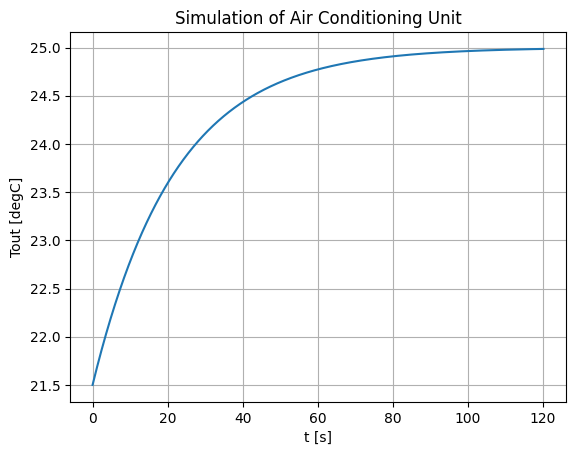

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters
Kh = 3.5
theta_t = 22
theta_d = 2
T_env = 21.5

# Simulation Parameters
T_s = 0.1 # Sampling Time
T_stop = 120 # End of Simulation Time
uk = 1 # Step Response
N = int(T_stop / T_s) # Simulation length
T_out = np.zeros(N + 2) # Initialization the Tout vector
T_out[0] = T_env # Initial Value

# Simulation
for n in range(1, N + 2):
    t = n * T_s
    T_out[n] = T_out[n - 1] + (T_s / theta_t) * (- T_out[n - 1] + Kh * uk + T_env)

# Plot the Simulation Results
t = np.arange(0, T_stop + 2 * T_s, T_s) #Create the Time Series
plt.plot(t, T_out)

# Formatting the appearance of the Plot
plt.title('Simulation of Air Conditioning Unit')
plt.xlabel('t [s]')
plt.ylabel('Tout [degC]')
plt.grid()
plt.show()


### Control System Design and Analysis

In [42]:
import control as ct

# Process Parameters
Kh = 3.5
theta_t = 22
theta_d = 2

# Transfer Function Process
sys_p = ct.tf([Kp * Ti, Kp], [Ti])

# Transfer Function PI Controller
Kp = 1
Ti = 1
sys_pi = ct.tf([Kp * Ti, Kp], [Ti])

# The Loop Transfer function
sys_l = ct.series(sys_pi, sys_p)

# Tracking transfer function
# YOUR CODE HERE

# Sensitivity transfer function
# YOUR CODE HERE

# Step Response Feedback System (Tracking System)
# YOUR CODE HERE

plt.figure(0)
# plt.plot(t,y)
# plt.title("Step Response Feedback System T(s)")
# plt.grid()

# Bode Diagram with Stability Margins
plt.figure(1)
#YOUR CODE HERE

# Poles and Zeros
#YOUR CODE HERE
plt.figure(2)

# Calculating stability margins and crossover frequencies
# YOUR CODE HERE


# Convert gm to Decibel
# YOUR CODE HERE


# Find when Sysem is Marginally Stable (Kritical Gain - Kc)
# YOUR CODE HERE

plt.show()


NameError: name 'Kp' is not defined

### Controller

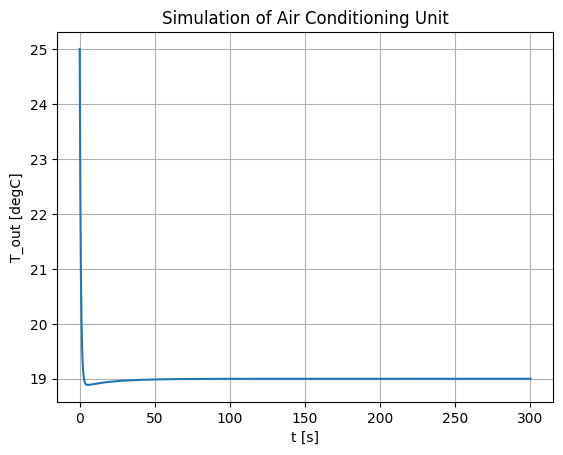

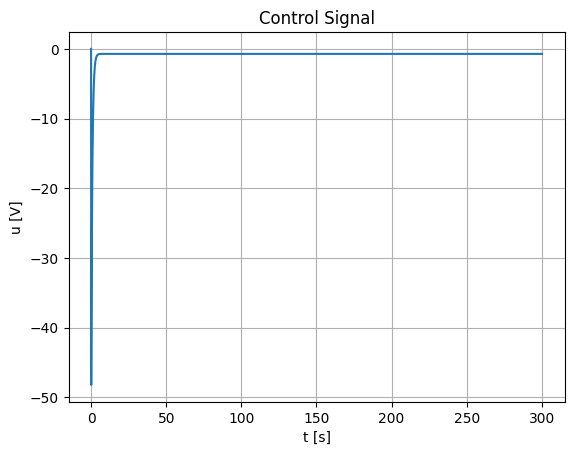

In [48]:
# Model Parameters
Kh = 3.5
theta_t = 22
theta_d = 2
T_env = 21.5

# Simulation Parameters
t_step = 0.1  # Sampling Time
t_stop = 300  # End of Simulation Time
N = int(t_stop / t_step)  # Simulation length
T_out = np.zeros(N + 2)  # Initialization the T_out vector
u = np.zeros(N + 2)  # Initialization the T_out vector
T_out[0] = 25  # Start Temperature

# PI Controller Settings
r = 19
K_P = 8
K_I = 0.4

# Simulation
e_acc = 0
for n in range(1, N + 2):
    t = n * t_step
    e = r - T_out[n - 1]
    e_acc += e
    dt = t_step
    u[n] = K_P * e + K_I * e_acc * dt
    T_out[n] = T_out[n - 1] + (T_s / theta_t) * (- T_out[n - 1] + Kh * u[n] + T_env)


# Plot the Simulation Results
t = np.arange(0, t_stop + 2 * t_step, t_step)  # Create the TimeSeries

# Plot Process Value
plt.figure(1)
plt.plot(t, T_out)

# Formatting the appearance of the Plot
plt.title('Simulation of Air Conditioning Unit')
plt.xlabel('t [s]')
plt.ylabel('T_out [degC]')
plt.grid()
plt.show()

# Plot Control Signal
plt.figure(2)
plt.plot(t, u)

# Formatting the appearance of the Plot
plt.title('Control Signal')
plt.xlabel('t [s]')
plt.ylabel('u [V]')
plt.grid()

plt.show()
